#ANÁLISIS EXPLORATORIO DE DATOS - MÓDULO 3

##ALUMNO: PEDRO FERCOVICH

##DATASET: https://www.kaggle.com/datasets/waqi786/student-performance-dataset

OBJETIVO: ANALIZAR GPA VS Tasa de asistencia vs PartTimeJob

##VALIDACIÓN DE DATOS Y ANÁLISIS DE NULOS

###1 - IMPORTAR LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###2 - ESTABLECER APARIENCIA DE GRÁFICOS

In [27]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

PartTimeJob_color = {
    'Yes': '#ff6602ff',
    'No': '#0f7175ff'
}

###3 - CARGAMOS EL DATASET





In [4]:
df_student_performance = pd.read_csv('/content/student_performance_data.csv')
df_student_performance

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...,...
495,496,Male,22,37,76.61,2.97,Science,No,No
496,497,Male,23,11,56.29,3.20,Science,No,No
497,498,Female,20,6,56.64,3.20,Science,No,Yes
498,499,Male,22,18,57.18,2.05,Business,No,Yes


###4 - ANÁLISIS DE TIPOS DE DATOS

In [5]:
df_student_performance.dtypes

,0
StudentID,int64
Gender,object
Age,int64
StudyHoursPerWeek,int64
AttendanceRate,float64
GPA,float64
Major,object
PartTimeJob,object
ExtraCurricularActivities,object


In [6]:
df_student_performance.dtypes.value_counts()

,count
object,4
int64,3
float64,2


In [7]:
df_student_performance.shape

(500, 9)

###5 - ANÁLISIS DE VALORES NULOS

In [8]:
df_student_performance.isnull().any()

,0
StudentID,False
Gender,False
Age,False
StudyHoursPerWeek,False
AttendanceRate,False
GPA,False
Major,False
PartTimeJob,False
ExtraCurricularActivities,False


In [9]:
df_student_performance.isnull().sum().sort_values(ascending=False)

,0
StudentID,0
Gender,0
Age,0
StudyHoursPerWeek,0
AttendanceRate,0
GPA,0
Major,0
PartTimeJob,0
ExtraCurricularActivities,0


In [10]:
df_student_performance.shape

(500, 9)

##ESTADÍSTICA DESCRIPTIVA

### 1 - MEDIDAS DE TENDENCIA CENTRAL

MEDIA

In [11]:
df_student_performance.mean(numeric_only=True)

,0
StudentID,250.50000
Age,20.95600
StudyHoursPerWeek,19.87600
AttendanceRate,74.99038
GPA,2.98516


MEDIANA

In [12]:
df_student_performance.median(numeric_only=True)

,0
StudentID,250.50
Age,21.00
StudyHoursPerWeek,20.50
AttendanceRate,75.73
GPA,3.00


In [13]:
df_student_performance.mode(numeric_only=True)

,StudentID,Age,StudyHoursPerWeek,AttendanceRate,GPA
0,1,22.0,26.0,62.63,2.51
1,2,NaN,NaN,88.55,3.19
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
495,496,NaN,NaN,NaN,NaN
496,497,NaN,NaN,NaN,NaN
497,498,NaN,NaN,NaN,NaN
498,499,NaN,NaN,NaN,NaN


### 2 - MEDIDAS DE DISPERSIÓN

RANGO (MÁXIMOS Y MÍNIMOS)

In [14]:
df_student_performance.min(numeric_only=True)

,0
StudentID,1.00
Age,18.00
StudyHoursPerWeek,1.00
AttendanceRate,50.01
GPA,2.00


In [15]:
df_student_performance.max(numeric_only=True)

,0
StudentID,500.00
Age,24.00
StudyHoursPerWeek,39.00
AttendanceRate,99.97
GPA,3.99


DESVIACIÓN ESTÁNDAR

In [16]:
df_student_performance.std(numeric_only=True)

,0
StudentID,144.481833
Age,2.000517
StudyHoursPerWeek,11.471347
AttendanceRate,14.565917
GPA,0.563620


RANGO INTERCUARTÍLICO

In [17]:
df_student_performance.quantile(q=[0.25,0.50,0.75],numeric_only=True).transpose().rename_axis('metric').reset_index().assign(iqr = lambda df: df[0.75] - df[0.25])

,metric,0.25,0.5,0.75,iqr
0,StudentID,125.7500,250.50,375.25,249.5000
1,Age,19.0000,21.00,23.00,4.0000
2,StudyHoursPerWeek,10.0000,20.50,30.00,20.0000
3,AttendanceRate,62.6075,75.73,87.22,24.6125
4,GPA,2.4875,3.00,3.48,0.9925


GRAFICAMOS MEDIDAS CENTRALES Y DE DISPERSIÓN DE LA VARIABLE AttendanceRate

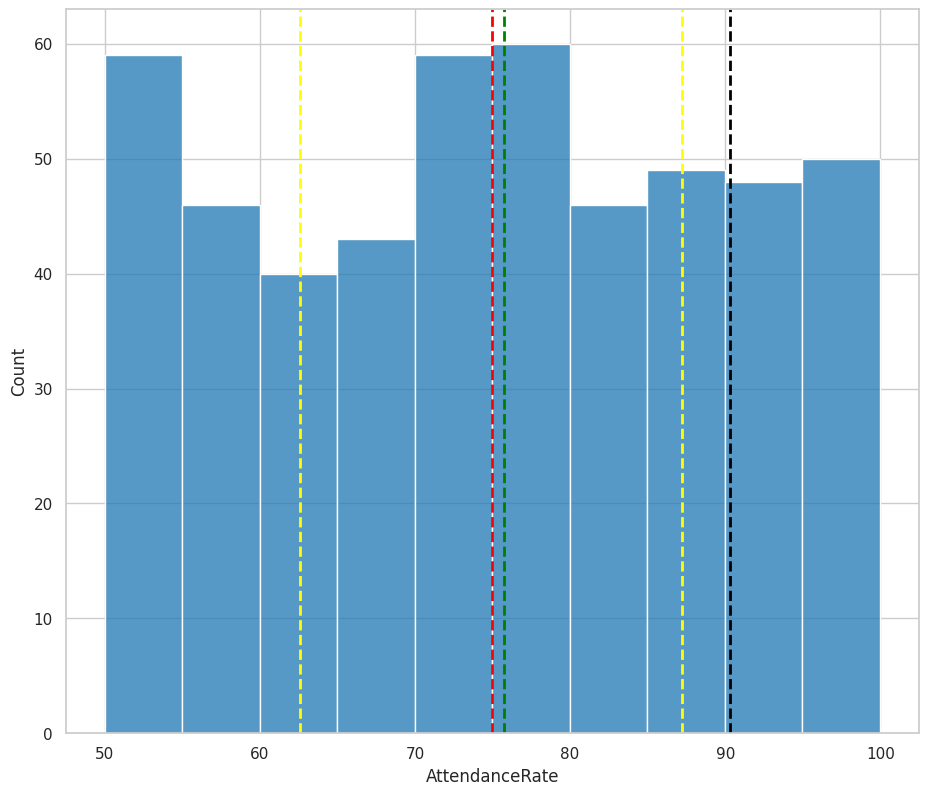

In [18]:
sns.histplot(
    data=df_student_performance,
    x='AttendanceRate'
)
plt.axvline(
    x=df_student_performance.AttendanceRate.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_student_performance.AttendanceRate.median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_student_performance.AttendanceRate.std() + df_student_performance.AttendanceRate.median(),
    color='black',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_student_performance.AttendanceRate.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df_student_performance.AttendanceRate.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

<Axes: xlabel='AttendanceRate'>

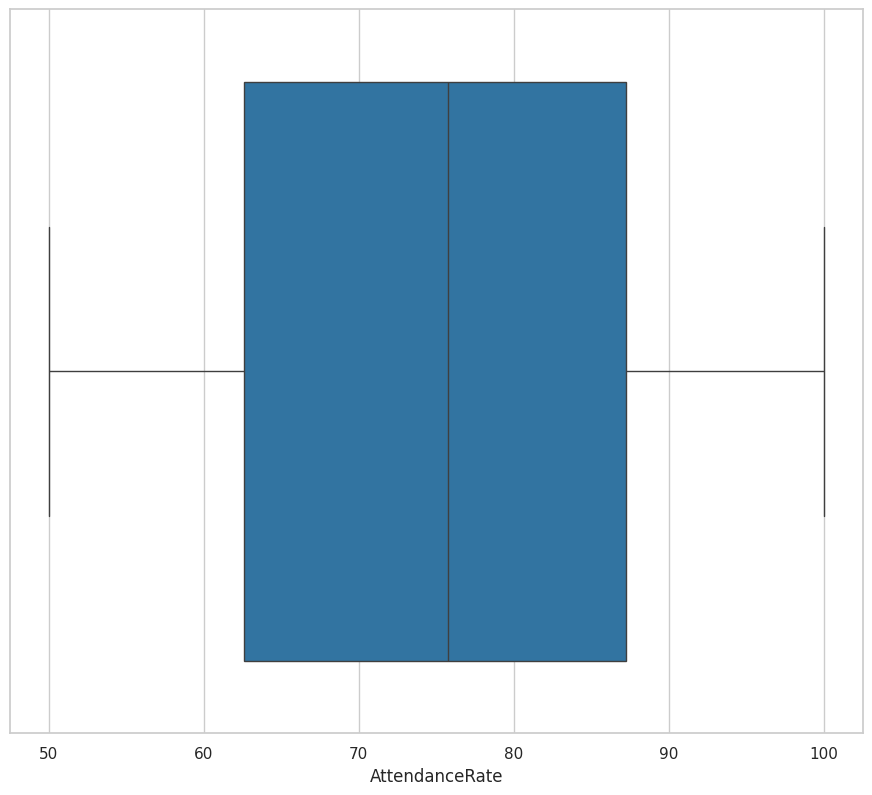

In [20]:
sns.boxplot(x=df_student_performance.AttendanceRate)

###CONTEOS Y PROPORCIONES

In [21]:
df_student_performance.describe()

,StudentID,Age,StudyHoursPerWeek,AttendanceRate,GPA
count,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,20.956000,19.876000,74.990380,2.98516
std,144.481833,2.000517,11.471347,14.565917,0.56362
min,1.000000,18.000000,1.000000,50.010000,2.00000
25%,125.750000,19.000000,10.000000,62.607500,2.48750
50%,250.500000,21.000000,20.500000,75.730000,3.00000
75%,375.250000,23.000000,30.000000,87.220000,3.48000
max,500.000000,24.000000,39.000000,99.970000,3.99000


In [22]:
df_student_performance.describe(include=object)

,Gender,Major,PartTimeJob,ExtraCurricularActivities
count,500,500,500,500
unique,2,5,2,2
top,Female,Business,Yes,No
freq,256,114,268,260


ANALIZAMOS CATEGÓRICO CLAIM_STATUS

####CONTEO DE DATOS

<Axes: xlabel='PartTimeJob'>

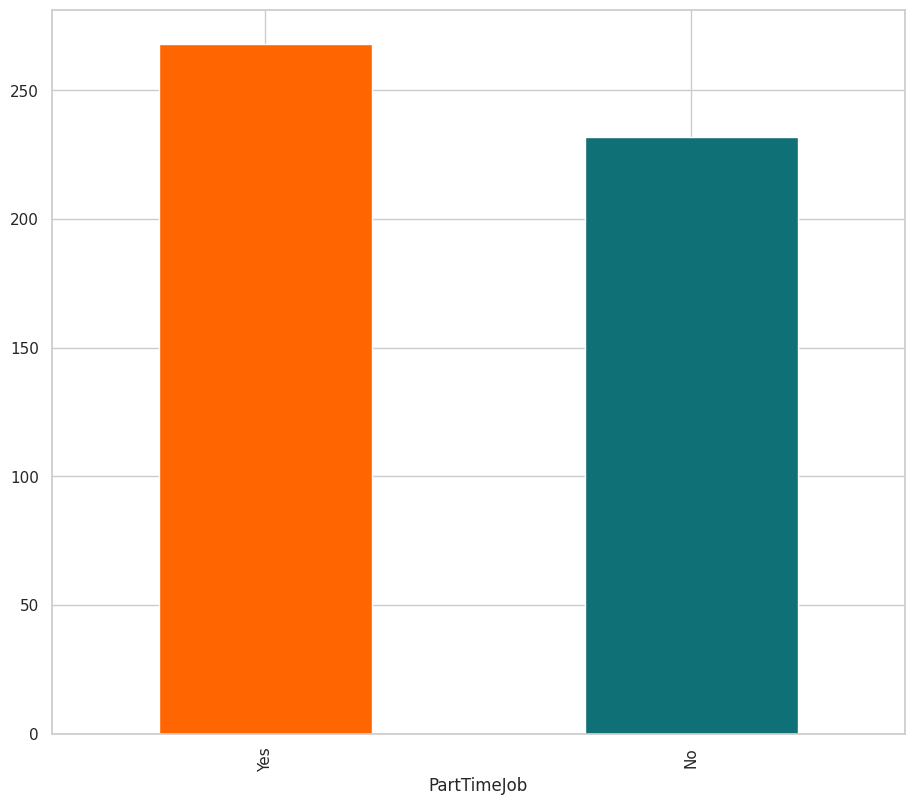

In [48]:
(
    df_student_performance
    .PartTimeJob
    .value_counts()
    .plot(
        kind='bar',
        color = PartTimeJob_color.values()
    )
)

####PROPORCION DE DATOS

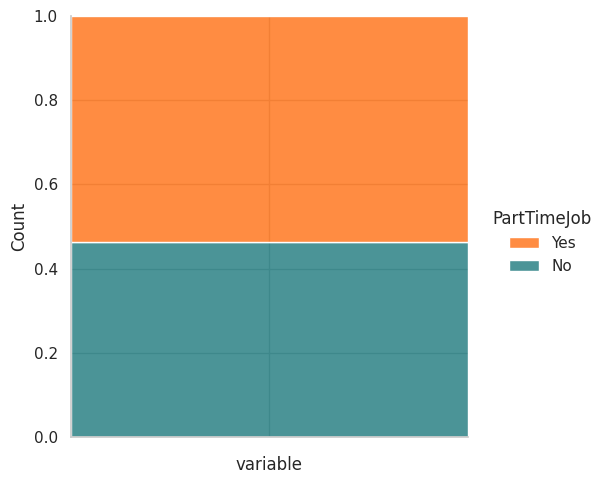

In [49]:
df_student_performance['variable'] = ''
(
    df_student_performance
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='PartTimeJob',
                multiple='fill',
                palette=PartTimeJob_color
            )
        )
    )
)

##ANÁLISIS BIVARIADO

In [30]:
df_student_performance.head(2)

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities,variable
0,1,Male,24,37,90.75,3.47,Arts,Yes,No,
1,2,Female,22,37,74.90,2.32,Education,No,No,


<Axes: xlabel='AttendanceRate', ylabel='GPA'>

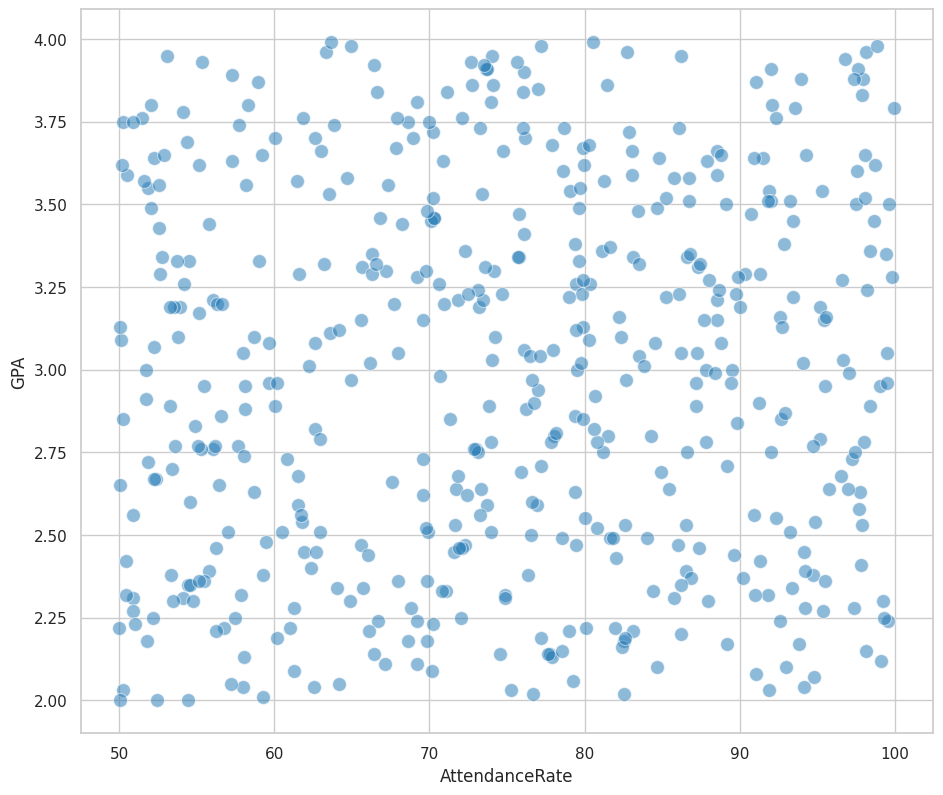

In [31]:
sns.scatterplot(
    data=df_student_performance,
    x='AttendanceRate',
    y='GPA',
    alpha=1/2,
    s=100
)


# Del gráfico anterior, concluyo que no hay una relación directa clara entre la tasa de asistencia y el GPA (suponía que a menor asistencia obtendría menor GPA)

<Axes: xlabel='PartTimeJob', ylabel='AttendanceRate'>

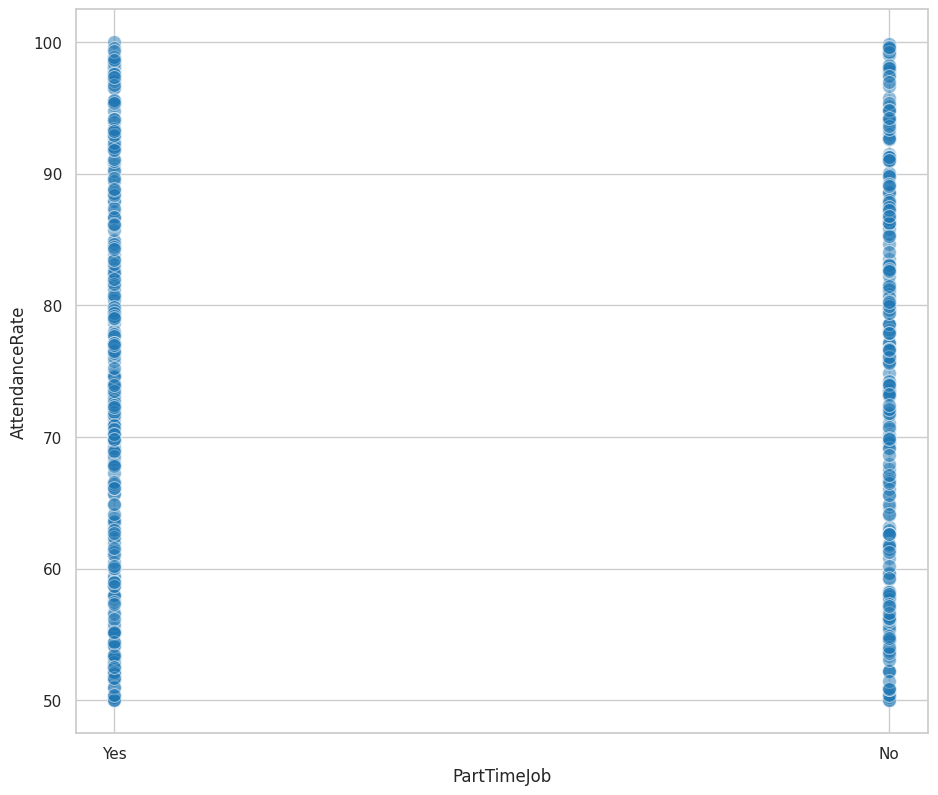

In [35]:
sns.scatterplot(
    data=df_student_performance,
    x='PartTimeJob',
    y='AttendanceRate',
    alpha=1/2,
    s=100
)

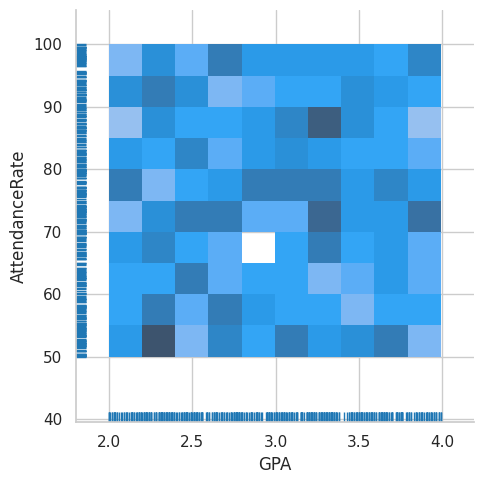

In [41]:
sns.displot(
    data=df_student_performance,
    x='GPA',
    y='AttendanceRate',
    rug=True
)

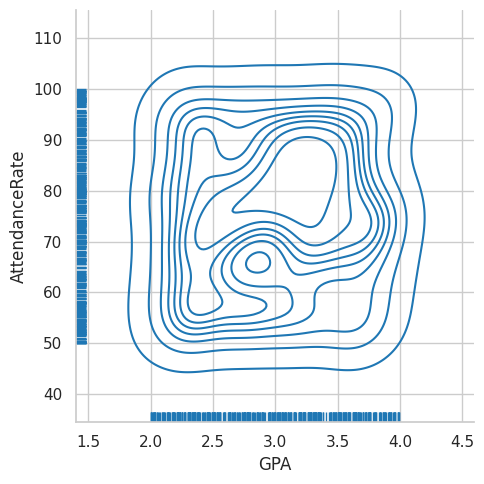

In [42]:
sns.displot(
    data=df_student_performance,
    x='GPA',
    y='AttendanceRate',
    kind='kde',
    rug=True
)

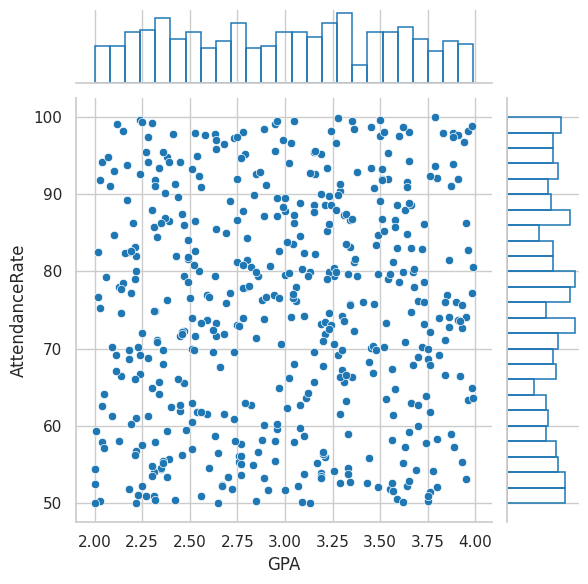

In [43]:
sns.jointplot(
    data=df_student_performance,
     x='GPA',
    y='AttendanceRate',
    marginal_kws=dict(bins=25,fill=False)
)

RELACIONES ENTRE CATEGÓRICO Y DISCRETO : GRÁFICO DE VIOLIN Y BOXPLOTS

<Axes: xlabel='PartTimeJob', ylabel='GPA'>

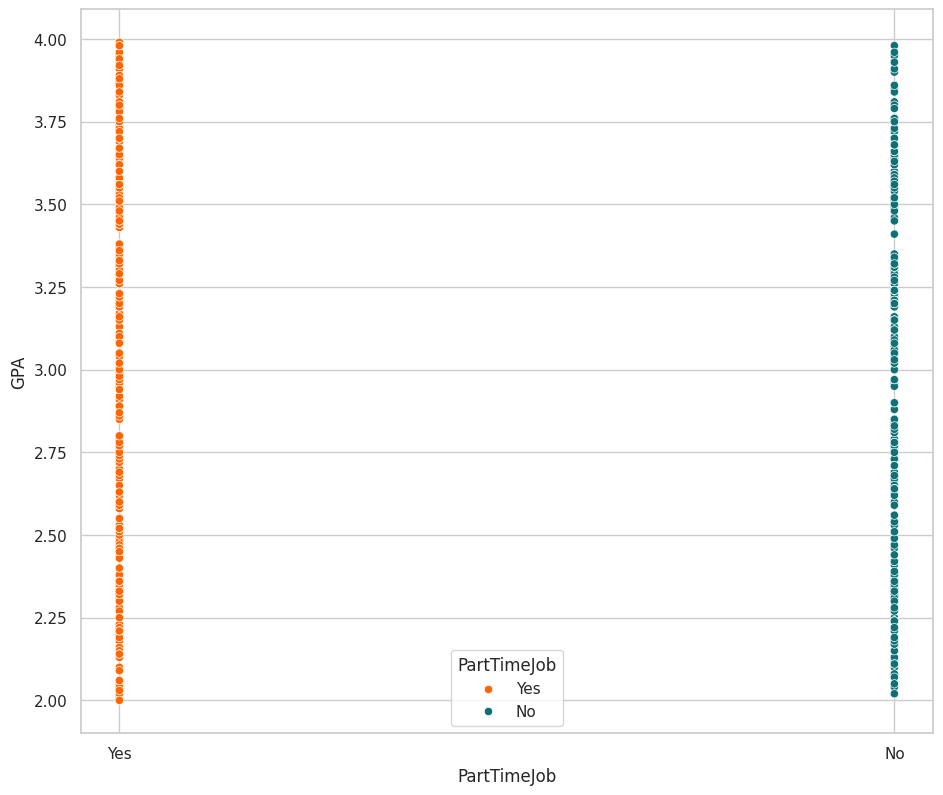

In [44]:
sns.scatterplot(
    data=df_student_performance,
    x='PartTimeJob',
    y='GPA',
    hue='PartTimeJob',
    palette=PartTimeJob_color
)

GENERAMOS RUIDO EN LOS VALORES

<ipython-input-45-27e1686dea3c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


<Axes: xlabel='PartTimeJob', ylabel='GPA'>

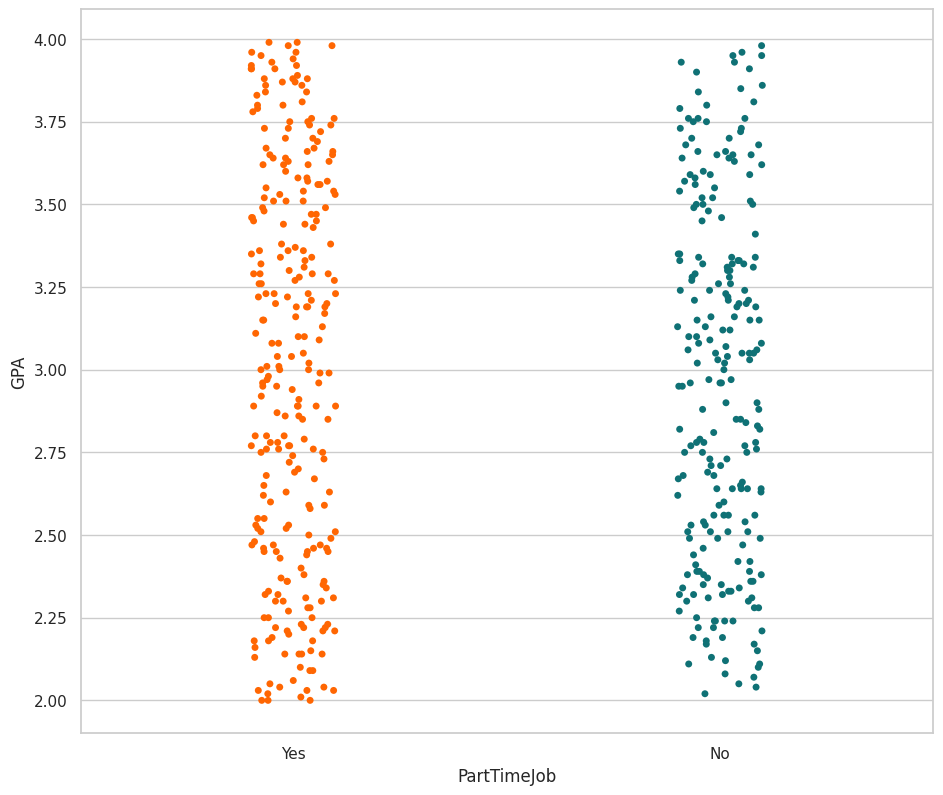

In [45]:
sns.stripplot(
    data=df_student_performance,
    x='PartTimeJob',
    y='GPA',
    palette=PartTimeJob_color
)


<ipython-input-46-0dc8dd669f81>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


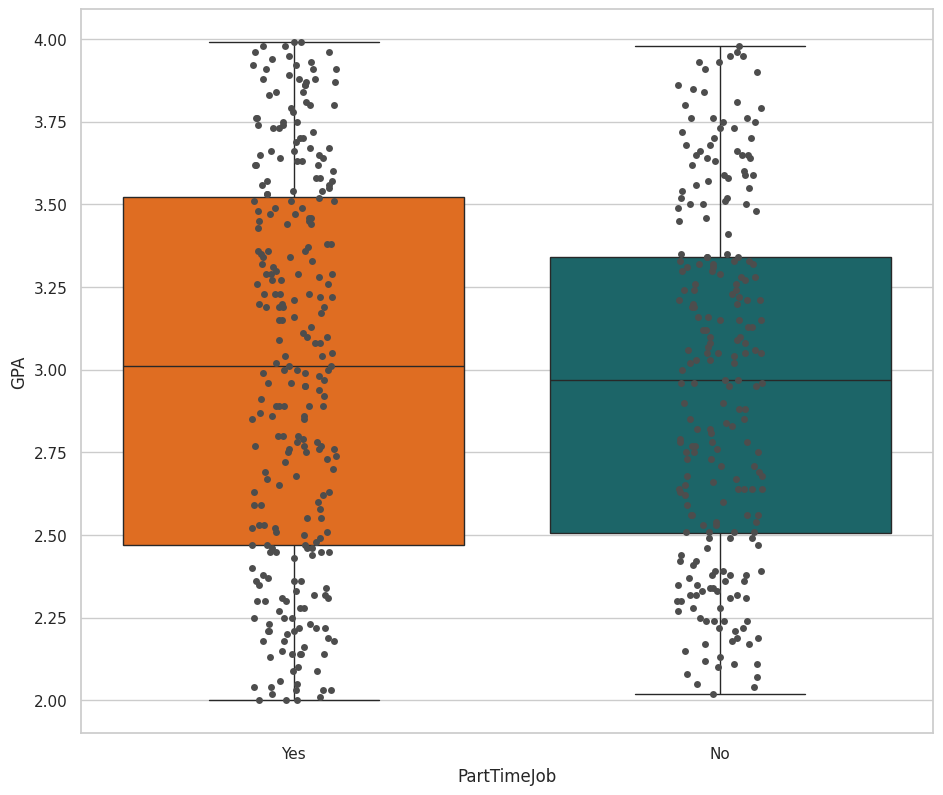

In [46]:
ax = sns.boxplot(
    data=df_student_performance,
    x='PartTimeJob',
    y='GPA',
    palette=PartTimeJob_color,
    whis=np.inf
)

ax = sns.stripplot(
    data=df_student_performance,
    x='PartTimeJob',
    y='GPA',
    color='.3'
)

<ipython-input-47-c0a94e7fbd79>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(


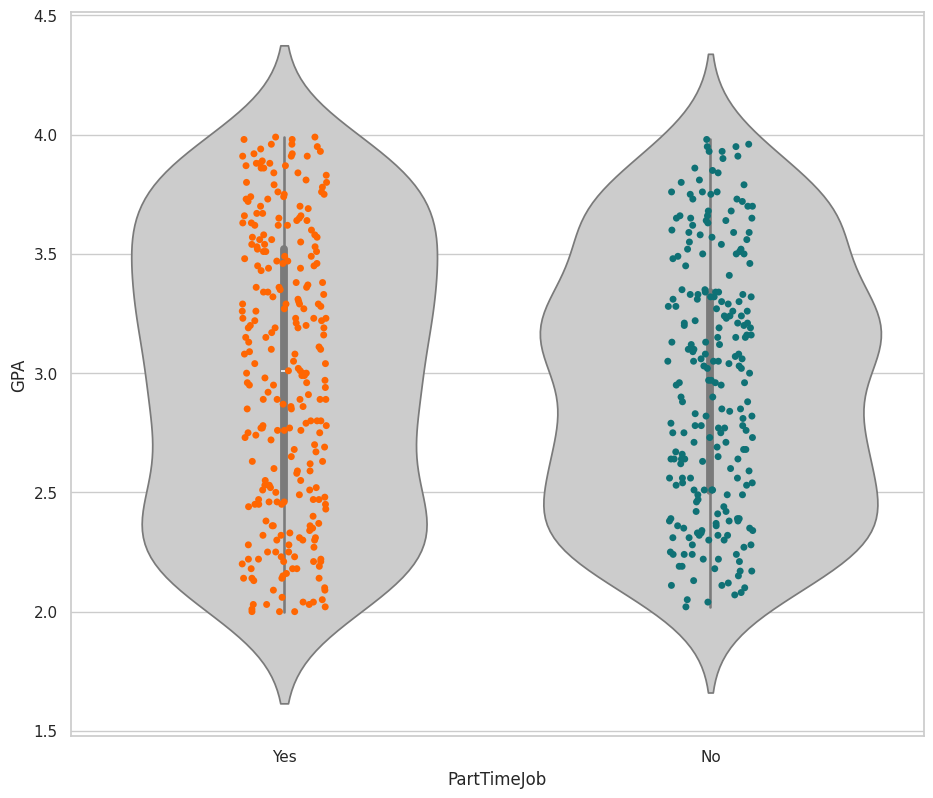

In [47]:
ax = sns.violinplot(
    data=df_student_performance,
    x='PartTimeJob',
    y='GPA',
    color='.8'
)

ax = sns.stripplot(
    data=df_student_performance,
    x='PartTimeJob',
    y='GPA',
    palette=PartTimeJob_color
)